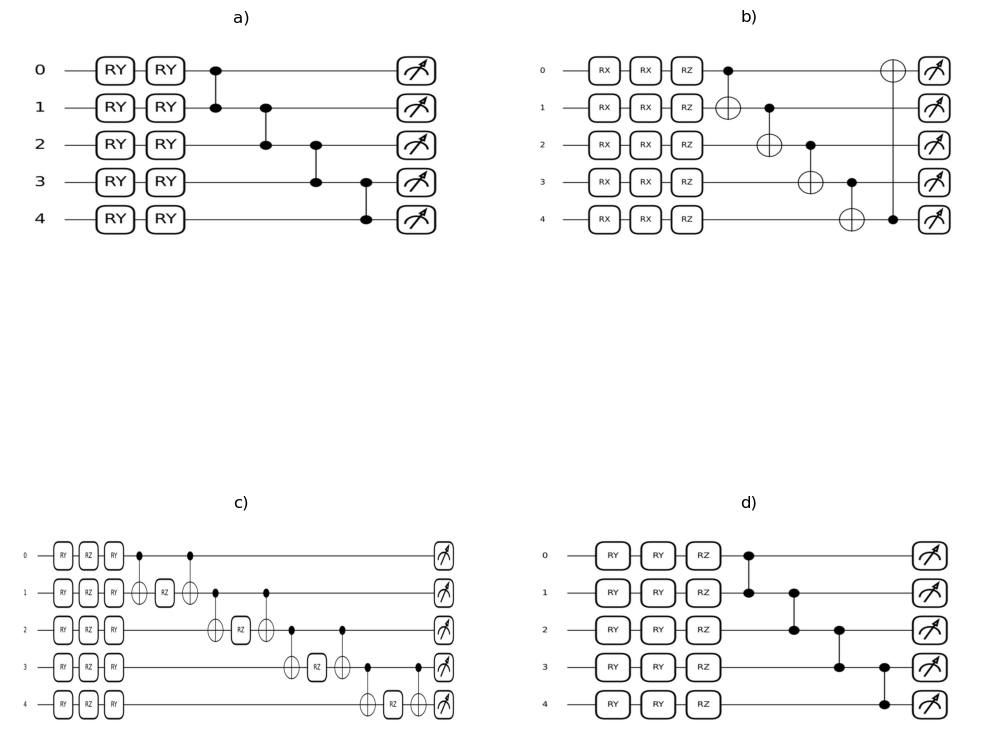

In [18]:
import matplotlib.pyplot as plt
import os
import fitz 
from PIL import Image
import io


folder_path = os.getcwd()

pdf_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(".pdf")])[:4]

target_size = (1200, 600)

images = []
for pdf in pdf_files:
    doc = fitz.open(os.path.join(folder_path, pdf))  
    pix = doc[0].get_pixmap() 
    img = Image.open(io.BytesIO(pix.tobytes("png"))).convert("RGB")
    img = img.resize(target_size, Image.LANCZOS)  # Resize to uniform dimensions
    images.append(img)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, img, title in zip(axes, images, pdf_files):
    ax.imshow(img)
    ax.set_title(os.path.splitext(title)[0])
    ax.axis("off")  
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.001)
plt.show()
